# Time-mean total Kinetic Energy (KE) at the surface

This notebook is converted from plt_surf_EKE.py, which calculates and plots the time-mean total Kinetic Energy (mTKE) at the surface.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import scipy.io

In [2]:
data = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v33/output028/prog.nc','r')

In [3]:
xh = data.variables['xh'][:]
yh = data.variables['yh'][:]

In [4]:
us = data.variables['u'][:,0,:,:]
vs = data.variables['v'][:,0,:,:]

Convert vs from a MaskedArray to a ndarray:

In [5]:
vs = vs.filled(np.nan)

TKE(t,y,x) - total Kinetic Energy as a function of time

In [6]:
TKE = 0.5 * (us**2 + vs**2)

mTKE(y,x) - time-mean TKE

In [8]:
mTKE = np.nanmean(TKE,axis=0)

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:607: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Convert to log scale for plotting:

In [9]:
mTKE0 = np.log10(mTKE)

In [11]:
%matplotlib inline

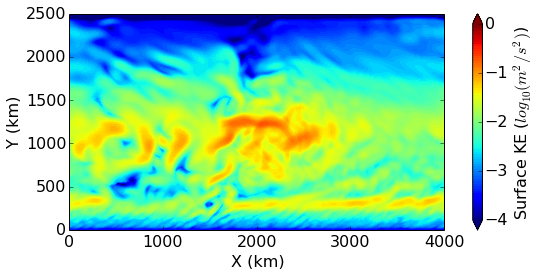

In [12]:
plt.figure(1,figsize=(8,5))

kelev = np.arange(-4,0+0.05,0.05)
ketik = np.arange(-4,0+1,1)

X,Y=np.meshgrid(xh,yh)

pc = plt.contourf(X,Y,mTKE0,cmap=plt.cm.jet,levels=kelev,extend='both')
cb = plt.colorbar(pc,ticks=ketik)
plt.gca().set_yticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_yticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_xticks(np.arange(-2000,2000 + 1000,1000))
plt.gca().set_xticklabels(['0','1000','2000','3000','4000'])
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Surface KE ($log_{10}(m^{2}/s^{2})$)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('X (km)',fontsize=16)
plt.ylabel('Y (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.savefig('/short/v45/lxy581/mom6/diag/v33_surf_mTKE_y50.png',dpi=600)

plt.show()